## keras_합성곱신경망

### FashionMNIST CNN



In [38]:
import tensorflow
from tensorflow import keras
from sklearn.model_selection import train_test_split #검증세트 만들기 위해서


In [39]:
(train_input, train_target) , (test_input, test_target)  = keras.datasets.fashion_mnist.load_data()

In [40]:
train_input.shape

(60000, 28, 28)

In [41]:
# 255.0 정규화처리(스케일링, 0과 1사이값)
# reshape(-1, 28, 28, 1) 4차원 배열로 변경 - 채널추가를 위해서
train_scaled= train_input.reshape(-1, 28, 28, 1)  / 255.0

In [42]:
train_scaled.shape

(60000, 28, 28, 1)

In [43]:
test_scaled= test_input.reshape(-1, 28, 28, 1)  / 255.0

In [44]:
#훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, random_state=42 , test_size=0.2
)

In [45]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape,val_target.shape)


(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)


#### 합성곱 신경망 만들기


In [46]:
model = keras.Sequential(name='CNN1')

# 32 - 합성곱 층의 필터 갯수
# kernel_size  3 - (3x3)크기의 커널
# padding same - 패딩 추가해서 특성맵 사이즈를 원본과 동일하게

model.add(keras.layers.Conv2D(32, kernel_size = 3 , activation = 'relu', padding = 'same' , input_shape=(28,28,1)))

In [47]:
model.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
#  2x2 크기의 맥스 풀링(Max Pooling) 을 적용하는 레이어를 모델에 추가->특성맵이 반으로 줄어듬   ->14x14 이미지
# keras.layers.MaxPooling2D(pool_size=2)
model.add(keras.layers.MaxPooling2D(2)) 

In [49]:
model.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# 두번째 합성곱/풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size = 3 , activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))   # 사이즈반으로 줄어듬 ->7x7x64특성맵 ->3136개의 출력

In [51]:
model.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
Total params: 18816 (73.50 KB)
Trainable params: 18816 (73.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
# 심층신경망
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

- 위의 학습을 위해 나눠놓은 것을 아래에 하나의 셀에 합치자!

In [53]:
model = keras.Sequential(name='CNN1')

model.add(keras.layers.Conv2D(32, kernel_size = 3 , activation = 'relu', padding = 'same' , input_shape=(28,28,1), name='Fisrt_CNN'))
model.add(keras.layers.MaxPooling2D(2, name='Fisrt_Pooling')) 
model.add(keras.layers.Conv2D(64, kernel_size = 3 , activation='relu', padding='same', name='Second_CNN'))
model.add(keras.layers.MaxPooling2D(2, name='Second_Pooling'))
model.add(keras.layers.Flatten( name = 'flatten'))
model.add(keras.layers.Dense(100, activation='relu' , name = 'hidden'))
model.add(keras.layers.Dropout(0.4, name = 'dropout'))
model.add(keras.layers.Dense(10, activation='softmax',name = 'output'))

In [54]:
model.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Fisrt_CNN (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 Fisrt_Pooling (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 Second_CNN (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 Second_Pooling (MaxPooling  (None, 7, 7, 64)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 hidden (Dense)              (None, 100)               313700 

In [55]:
!pip install pydot


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


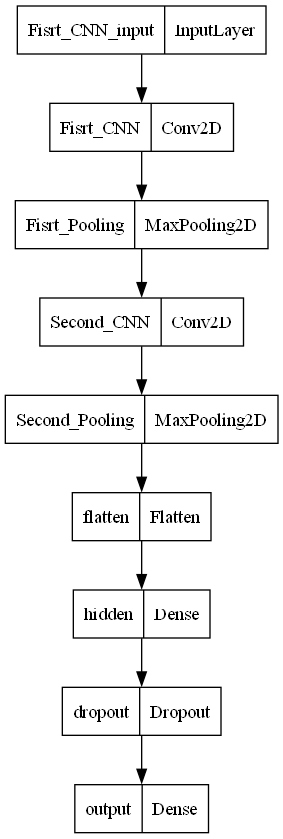

In [56]:
# 모델 시각화
# !pip install pydot
# https://graphviz.gitlab.io/download/) - graphviz-12.2.1(64bit) exe install - add all users 선택
# vscode 재시작
keras.utils.plot_model(model)

#### 모델 컴파일 , 훈련

In [57]:
model.compile(loss= 'sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [58]:
# 모델 훈련
histroy = model.fit(train_scaled,train_target, epochs= 50, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5502 - accuracy: 0.8028 - val_loss: 0.3570 - val_accuracy: 0.8689
Epoch 2/50
  25/1500 [..............................] - ETA: 6s - loss: 0.3884 - accuracy: 0.8550

c:\Source\iot_dataanalysis_2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 7s 5ms/step - loss: 0.3612 - accuracy: 0.8687 - val_loss: 0.2791 - val_accuracy: 0.8975
Epoch 3/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3111 - accuracy: 0.8872 - val_loss: 0.2610 - val_accuracy: 0.8999
Epoch 4/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2805 - accuracy: 0.8983 - val_loss: 0.2343 - val_accuracy: 0.9139
Epoch 5/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2537 - accuracy: 0.9067 - val_loss: 0.2479 - val_accuracy: 0.9065
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2346 - accuracy: 0.9138 - val_loss: 0.2249 - val_accuracy: 0.9163
Epoch 7/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2191 - accuracy: 0.9192 - val_loss: 0.2258 - val_accuracy: 0.9168
Epoch 8/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2033 - accuracy: 0.9241 - val_loss: 0.2274 - val_accuracy: 0.9189


In [59]:
# 정확도 확인
import matplotlib.pyplot as plt

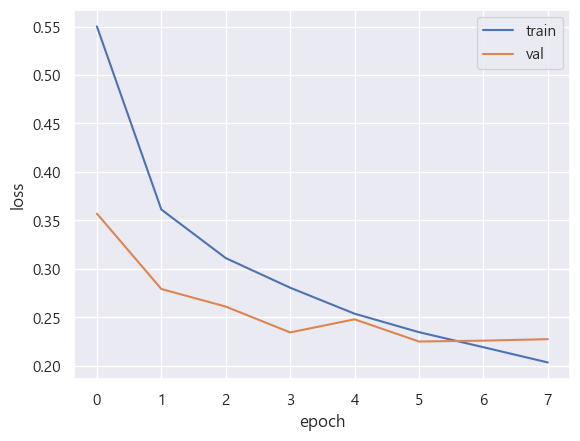

In [60]:
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [61]:
# 모델 검증정확도
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2249 - accuracy: 0.9163


[0.22492723166942596, 0.9163333177566528]

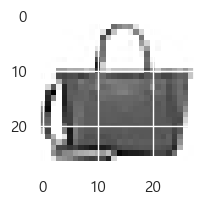

In [62]:
# val_scaled[0]
plt.figure(figsize=(2,2))
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()


class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [78]:
# 가방이 인덱스 8인데 예측결과 8번째인덱스 값이 1이다. 예측정확!
model.predict(val_scaled[0:1]).round(2)

1/1 [==============================] - 0s 16ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [83]:
pred_result = model.predict(test_scaled).round(2)

313/313 [==============================] - 1s 2ms/step


### 예측시각화

In [68]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [65]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [76]:
# 테스트이미지와 예측결과 시각화
def show_image(index):
    plt.figure(figsize=(2,2))
    plt.imshow(test_scaled[index].reshape(28, 28), cmap='gray_r')
    true_label = class_names[test_target[index]]
    pred_label = class_names[np.argmax(pred_result[index])]

    #plt.title(f'실제: {true_label}, 예측: {pred_label}')
    plt.text(0, -6, f'실제: {true_label}', fontsize=12, color='blue')
    plt.text(0, -3, f'예측: {pred_label}', fontsize=12, color='red', fontweight='bold')

    plt.axis('off')
    plt.show()

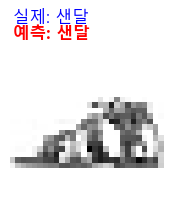

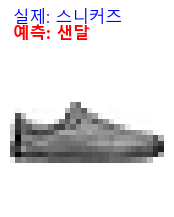

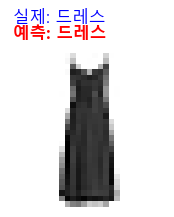

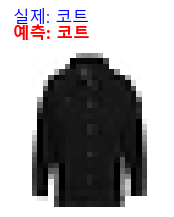

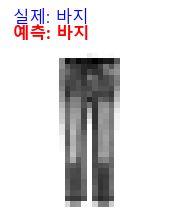

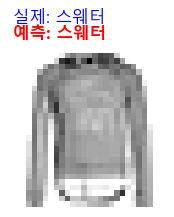

In [84]:
for i in range(11,17):
    show_image(i)

#### 결론
- 일반신경망이나 심층신경망으로 훈련했을 때보다 합성곱신경망이 정확도가 높아짐
- 심층신경망 : 대략 88%
- 합성곱신경망 : 대략 92%